In [48]:
# import Dependencies
import pandas as pd
from pathlib import Path
import csv
import os
import json
import requests
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress

In [49]:
#might use this csv might not

#residential_energy= Path(r"C:\Users\Flore\OneDrive\Desktop\Class Folder\Project1_group4\denisa_project\test_energy_data.csv")
#pd.read_csv(residential_energy)


In [50]:

#input data from csv & load file
energy_data= Path(r"C:\Users\Flore\OneDrive\Desktop\Class Folder\Project1_group4\denisa_project\owid-energy-data.csv")
df = pd.read_csv(energy_data)

#clean the data set and drop and missing values for the energy consuption and green house gas emissions
df_cleaned = df.dropna(subset=["primary_energy_consumption", "greenhouse_gas_emissions"])
df_cleaned.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
124,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
125,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
126,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
127,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
128,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [51]:
#Start extracting data from csv and sorting out the information we want

selected_countries = ["China", "India", "Brazil", "Pakistan", "Mexico"]

new_df= df_cleaned[df_cleaned["country"].isin(selected_countries)]

latest_year = new_df["year"].max()
df_recent = new_df[new_df["year"] == latest_year]
df_final = df_recent[["country", "year", "primary_energy_consumption", "greenhouse_gas_emissions"]]
df_final.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
3060,Brazil,2023,3853.715,70.14
4505,China,2023,47427.562,5508.48
9328,India,2023,10837.855,1403.98
12008,Mexico,2023,2348.044,179.23
15532,Pakistan,2023,936.701,70.96


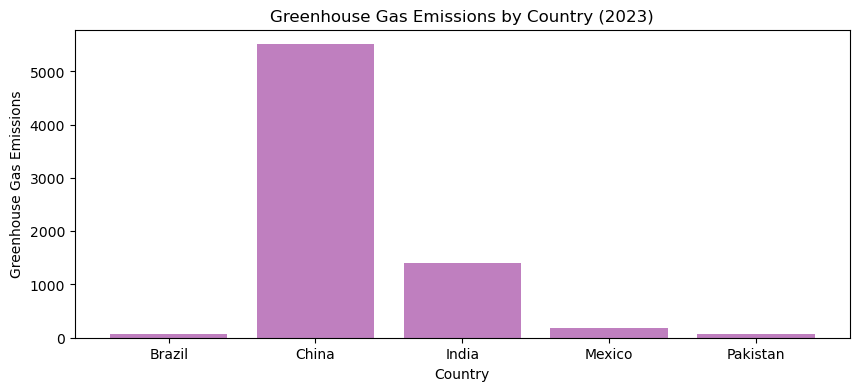

In [63]:
#create bar graph showing energy consuption by country and greenhouse gas emissions 

plt.figure(figsize=(10, 4))
plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='purple', alpha=0.5)
plt.xlabel("Country")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Greenhouse Gas Emissions by Country (2023)")
plt.show()